In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

Manipulate taste

In [2]:
order = []
with open('soda_order.txt', 'r') as f:
    for line in f:
        order.append(line.strip())
        
order = np.array(order)
len(order)

79

Combine with transaction

In [3]:
order_df = pd.read_csv('statement.csv')
order_df = order_df.iloc[:, :2]
order_df['datetime'] = pd.to_datetime(order_df['datetime'], format='%d/%m/%Y %H:%M')
order_df

,datetime,Credit
0,2025-04-30 13:35:00,25
1,2025-04-30 13:43:00,25
2,2025-04-30 13:47:00,25
3,2025-04-30 13:47:00,25
4,2025-04-30 13:49:00,25
...,...,...
74,2025-04-30 16:12:00,25
75,2025-04-30 16:12:00,25
76,2025-04-30 16:19:00,25
77,2025-04-30 16:20:00,25


In [4]:
order_df['taste'] = order
order_df.loc[ order_df['taste'] == 'apple', 'taste' ] = 'green apple'
order_df.loc[ order_df['taste'] == 'Thanos', 'taste' ] = 'mixed'
order_df['taste'].unique()

array(['blue hawaii', 'green apple', 'strawberry', 'mixed', 'punch',
       'lychee', 'orange'], dtype=object)

In [5]:
cash = {
    'datetime': pd.Timestamp('2025-04-30 13:30:00'), 
    'Credit': 25, 
    'taste': 'strawberry'
}

order_prep = pd.concat([order_df, pd.DataFrame([cash])])\
    .sort_values('datetime').reset_index(drop=True)
order_prep

,datetime,Credit,taste
0,2025-04-30 13:30:00,25,strawberry
1,2025-04-30 13:35:00,25,blue hawaii
2,2025-04-30 13:43:00,25,green apple
3,2025-04-30 13:47:00,25,blue hawaii
4,2025-04-30 13:47:00,25,blue hawaii
...,...,...,...
75,2025-04-30 16:12:00,25,green apple
76,2025-04-30 16:12:00,25,green apple
77,2025-04-30 16:19:00,25,punch
78,2025-04-30 16:20:00,25,mixed


Visualization

In [6]:
desired_order = ['blue hawaii', 'green apple', 'strawberry', 'punch', 'lychee', 'orange', 'mixed']
custom_palette = ['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'plum', 'orange', 'lightgray']

# Create a dictionary to map tastes to colors based on the desired order
color_mapping = dict(zip(desired_order, custom_palette))

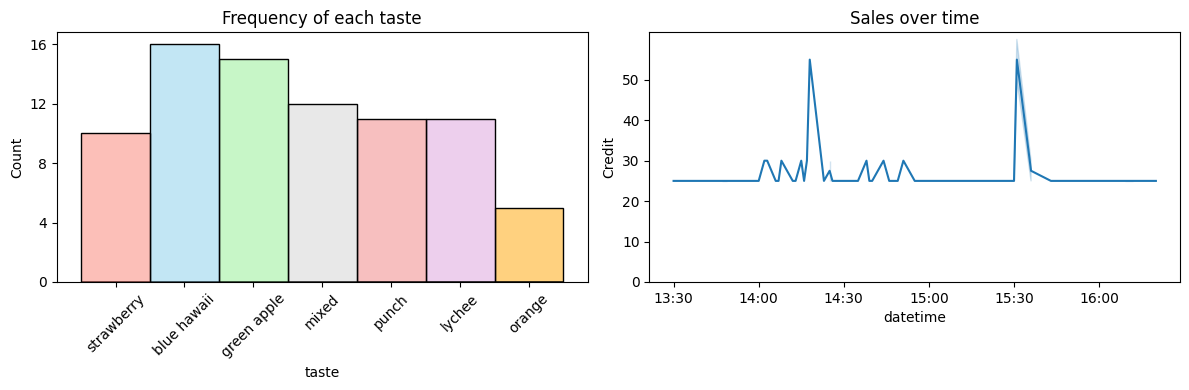

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(order_prep, x='taste', hue='taste', palette=color_mapping, legend=False)
plt.xticks(rotation=45)
plt.title('Frequency of each taste')
plt.yticks(np.arange(0, 20, step=4))

plt.subplot(1, 2, 2)
sns.lineplot(order_prep, x='datetime', y='Credit')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.title('Sales over time')
plt.yticks(np.arange(0, 60, step=10))

plt.tight_layout()
plt.show()

## Plotly

In [8]:
import plotly.express as px

fig = px.histogram(order_prep, x='taste', color='taste',
                   title='Distribution of Tastes',
                   category_orders={'taste': desired_order}, # Ensure the order of bars
                   color_discrete_map=color_mapping)
fig.update_layout(xaxis_title='Taste', yaxis_title='Frequency')
fig.show()